<a href="https://colab.research.google.com/github/mythili1910/mythili/blob/main/housing_price_dedection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
house=pd.read_csv('/content/Housing.csv')

In [ ]:
house

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
house.shape

(545, 13)

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
house.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
house['mainroad']=labelencoder.fit_transform(house['mainroad'])
print(house['mainroad'].unique())

house['guestroom']=labelencoder.fit_transform(house['guestroom'])
print(house['guestroom'].unique())

house['basement']=labelencoder.fit_transform(house['basement'])
print(house['basement'].unique())

house['hotwaterheating']=labelencoder.fit_transform(house['hotwaterheating'])
print(house['hotwaterheating'].unique())

house['airconditioning']=labelencoder.fit_transform(house['airconditioning'])
print(house['airconditioning'].unique())

house['prefarea']=labelencoder.fit_transform(house['prefarea'])
print(house['prefarea'].unique())

house['furnishingstatus']=labelencoder.fit_transform(house['furnishingstatus'])
print(house['furnishingstatus'].unique())

[1 0]
[0 1]
[0 1]
[0 1]
[1 0]
[1 0]
[0 1 2]


In [ ]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [ ]:
x=house[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']]
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [ ]:
y=house['price']
y


,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [ ]:
from sklearn.metrics import r2_score
from sklearn import linear_model
clf=linear_model.LinearRegression()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
score=r2_score(y_test,y_pred)
print(score)


0.7746775839048092


In [ ]:
from sklearn.metrics import r2_score
from sklearn import tree
clf1= tree.DecisionTreeClassifier()
clf1.fit(x_train,y_train)
y_pred=clf1.predict(x_test)
score=r2_score(y_test,y_pred)
print(score)

0.3760857030105036


In [ ]:

from sklearn.metrics import r2_score
from sklearn import svm
regr = svm.SVR()
regr.fit(x_train,y_train)
y_pred=regr.predict(x_test)
score=r2_score(y_test,y_pred)
print(score)

-0.13222556788744932


In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
X, y = make_regression(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
reg.predict(X_test[1:2])
reg.score(X_test, y_test)

0.440031029624667

In [ ]:
pridiction=clf.predict([[7420,4,2,3,1,0,0,0,1,2,1,0]])
print(pridiction)

[8142523.59685826]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


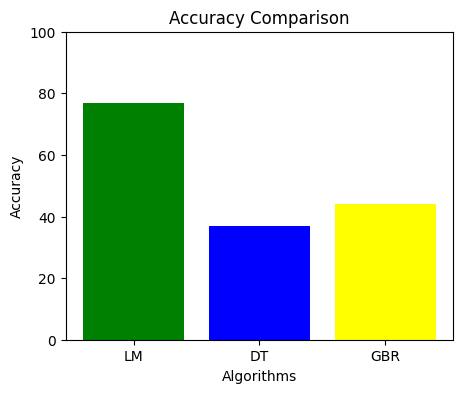

In [ ]:
import matplotlib.pyplot as plt

algorithms=['LM','DT','GBR']
accuracies=[77,37,44] # accuracy we got


#to show the graph difference
plt.figure(figsize=(5,4))
plt.bar(algorithms,accuracies,color=['green','blue','yellow'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim(0,100)
plt.show()